# Projects

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2Fprojects.ipynb)

<div class="alert alert-block alert-warning">
    <b>Schedule</b>
    
- Ask your supervisors for the data if not already provided (it is not included in this repository).
- Quick presentation.
- Final project presentation.
    
</div>

<div class="alert alert-block alert-info">
    <b>One problematic, One dataset, One (or more) method(s)</b>
    
- Quality of the dataset is key.
- Results on a clean notebook.
- Explain which method(s) you used and why.
- If a method fails, explain why.

</div>

## Variable Renewable Energy (VRE) assessment and forecast

### Project objectives
<div class="alert alert-block alert-info">

- Assess the onshore wind or solar photovoltaic hourly production over in metropolitan France regions using climate data and capacity factor observations.
- Predict the VRE power ahead of time.
</div>

### Dataset

- Observed monthly VRE capacity factors averaged over metropolitan France regions from 2014 to 2021
- Climate variables of your choice from a global reanalysis with an hourly sampling from 2010 to 2019

### First steps

- Choose from solar or wind power
- Read about solar/wind production assessment and forecast
- Estimate the hourly solar/wind production

In [42]:
df

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00+02:00,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23 07:00:00+02:00,2020-07-23,07:00:00,08:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23 16:00:00+02:00,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23 19:00:00+02:00,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23 23:00:00+02:00,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July
...,...,...,...,...,...,...,...,...,...
59801,2023-06-30 06:00:00+02:00,2023-06-30,06:00:00,07:00:00,Solar,55.0,181,Friday,June
59802,2023-06-30 13:00:00+02:00,2023-06-30,13:00:00,14:00:00,Solar,4554.0,181,Friday,June
59803,2023-06-30 14:00:00+02:00,2023-06-30,14:00:00,15:00:00,Solar,4589.0,181,Friday,June
59804,2023-06-30 16:00:00+02:00,2023-06-30,16:00:00,17:00:00,Solar,4173.0,181,Friday,June


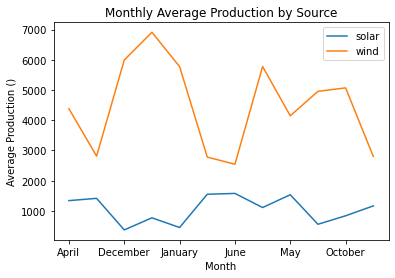

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/intermittent-renewables-production-france.csv')



# Assuming you have a DataFrame named df with the necessary data

# Create subplots
fig, ax = plt.subplots()

# Group and plot data for 'Solar' source
df.query('Source == "Solar"').groupby('monthName').mean()['Production'].plot(label='solar', ax=ax)

# Group and plot data for 'Wind' source
df.query('Source == "Wind"').groupby('monthName').mean()['Production'].plot(label='wind', ax=ax)

# Add a legend
ax.legend()

# Set labels and title as needed
ax.set_xlabel('Month')
ax.set_ylabel('Average Production ()')
ax.set_title('Monthly Average Production by Source')

# Show the plot
plt.show()


## Project: Forecast of El Nino

<img alt="weather" src="images/ENSO-normal.png" width=400 style="float:left">
<img alt="weather" src="images/ENSO-El_Nino.png" width=400 style="float:right">

- Natural mode of variability of the pacific equatorial ocean
- Big impact on the local economy
- Question: What is the predictability of El Nino?

### Data set

<img alt="weather" src="images/monthly-sst-lanina-normal-elnino.png" width=400>

- Variable: Global sea surface temperature (SST)
- Temporal resolution: monthly mean
- Spatial resolution: 1 degree$\times$1 degree

### First steps

- Read about El nino
- Characterize El nino: i.e. introduce a classifier
- What does it mean ``to make a prediction''?

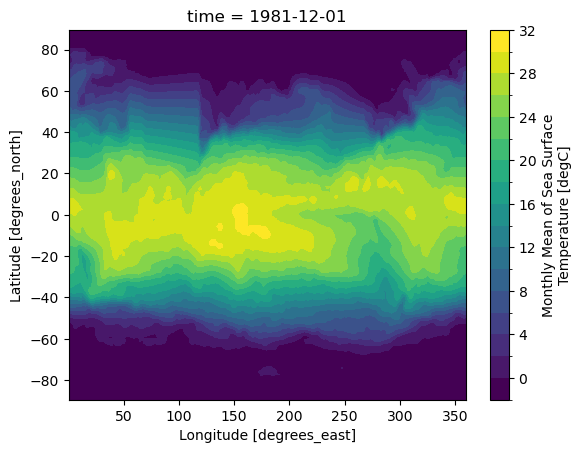

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr

dir0 = Path('../../../data/projects/el_nino/')
file_sst = 'sst.mnmean.nc'

# load the data set with xarray
ds = xr.open_dataset(Path(dir0, file_sst))

# the name of the variable is 'sst'
p = ds["sst"].isel(time=0).plot.contourf(levels=20, center=False)

## Project: Weather station

<img alt="weather" src="images/map.png" width=400>

- Suppose there are 5 weather stations that monitor the weather: Paris, Brest, London, Marseille and Berlin.
- The weather station in Paris breaks down
- Can we use the other stations to infer the weather in Paris

### Data set

<img alt="weather" src="images/annual_temperature.png" width=400>

- Surface variables: skt, u10, v10, t2m, d2m, tcc, sp, tp, ssrd, blh
- Temporal resolution: hourly
- Spatial resolution: N/A

### First steps

- Look at the correlations between variables.
- What variable do I want to predict
- What time scale am interested in?
- Start with the easy predictions and move on to harder ones
- Are there events that are more predictable than others?

<Axes: xlabel='time'>

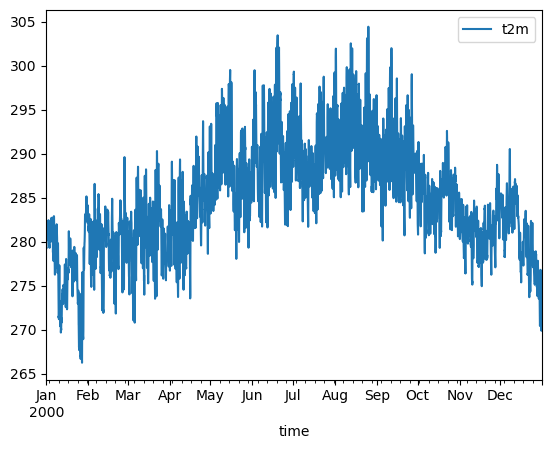

In [3]:
from pathlib import Path
import pandas as pd
import xarray as xr

dir0 = Path('../../../data/projects/weather/paris/')
file_t2m = 't2m.nc'

ds = xr.open_dataset(Path(dir0, file_t2m))

# convert to pandas dataframe
df = ds.to_dataframe()

# remove latitude and longitude indices
df = df.droplevel([0,1])

df[df.index.year==2000].plot()

## Project: NY traffic

Predict the daily taxi traffic in NY based on weather data

In [48]:
import pandas as pd

In [59]:
df = pd.read_csv('data/uberNY.csv',index_col=0)

<AxesSubplot:xlabel='timestamp'>

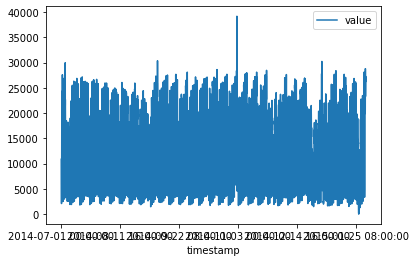

In [62]:
df.set_index('timestamp').plot()

## Project idea: Heat Related Mortality

This project aims to harness the power of machine learning to predict mortality rates in the European Union (EU) based on weather data. Extreme weather events, such as heatwaves and severe cold spells, have a significant impact on public health, often leading to an increase in mortality rates. With the growing challenges posed by climate change, it becomes crucial to understand and anticipate how weather conditions influence mortality.

By utilizing historical meteorological data, mortality records, and advanced machine learning techniques, this project seeks to develop predictive models that can forecast mortality rates in different EU regions. These models will enable early warning systems and informed decision-making by identifying periods of heightened health risks associated with specific weather patterns.

In summary, the project's core objective is to leverage machine learning to enhance our ability to predict mortality in response to changing weather conditions, ultimately contributing to improved public health preparedness and response strategies within the European Union.

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.
Several slides and images are taken from the very good [Scikit-learn course](https://inria.github.io/scikit-learn-mooc/).

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>